In [1]:
from pathlib import Path
BASE = Path.cwd()          # if you run from repo root
# or BASE = Path.home() / "thesis"   # if your thesis folder is always ~/thesis

OUT_TEX = BASE / "outputs" / "tex"
OUT_TEX.mkdir(parents=True, exist_ok=True)


In [4]:
print("GRB columns:", grb.columns.tolist())
print(grb.head(2))


GRB columns: ['NAME', 'RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'FLUENCE', 'FLUENCE_ERROR', 'T50', 'T50_ERROR', 'TRIGGER_NAME', 'log10T90']
                             NAME        RA      DEC  TRIGGER_TIME     T90  \
0  GRB120403857                     55.3384 -89.0093  56020.856927   4.288   
1  GRB120227725                    256.7300 -88.8600  55984.725475  17.408   

   T90_ERROR       FLUENCE  FLUENCE_ERROR    T50  T50_ERROR   TRIGGER_NAME  \
0      1.935  2.396400e-07   2.045800e-08  1.408      1.620  bn120403857\n   
1      0.810  2.194900e-05   1.040300e-07  6.656      0.572  bn120227725\n   

   log10T90  
0  0.632255  
1  1.240749  


In [5]:
def pick_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

GRB_CLASS_COL = pick_col(grb, ["class", "Class", "type", "Type", "category", "Category", "burst_type", "t90_class", "duration_class"])
print("Using GRB_CLASS_COL =", GRB_CLASS_COL)


Using GRB_CLASS_COL = None


In [6]:
grb["T90"] = pd.to_numeric(grb["T90"], errors="coerce")   # change "T90" if your column name differs
grb["class"] = np.where(grb["T90"] < 2.0, "short", "long")
GRB_CLASS_COL = "class"


In [7]:
def pick_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

GRB_CLASS_COL = pick_col(grb, ["class", "Class", "type", "Type", "category", "Category", "burst_type", "t90_class", "duration_class"])
print("Using GRB_CLASS_COL =", GRB_CLASS_COL)


Using GRB_CLASS_COL = class


In [8]:
# sanity check
print("Columns:", grb.columns.tolist())
print(grb[["T90","class"]].head(10))

print("Counts:", grb["class"].value_counts(dropna=False))
print("T90 stats:", grb["T90"].describe())


Columns: ['NAME', 'RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'FLUENCE', 'FLUENCE_ERROR', 'T50', 'T50_ERROR', 'TRIGGER_NAME', 'log10T90', 'class']
      T90 class
0   4.288  long
1  17.408  long
2  11.008  long
3  13.056  long
4  12.032  long
5   9.216  long
6   4.800  long
7  24.256  long
8   8.960  long
9   4.352  long
Counts: class
long     3505
short     703
Name: count, dtype: int64
T90 stats: count    4208.000000
mean       36.352219
std        56.318043
min         0.008000
25%         5.439250
50%        18.688000
75%        45.105000
max       984.084000
Name: T90, dtype: float64


In [9]:
import numpy as np
import pandas as pd
from scipy import stats

def bootstrap_ci_delta_median(x, y, nboot=5000, ci=0.95, seed=0):
    rng = np.random.default_rng(seed)
    x = np.asarray(x); y = np.asarray(y)
    x = x[np.isfinite(x)]; y = y[np.isfinite(y)]
    if len(x) < 5 or len(y) < 5:
        return np.nan, (np.nan, np.nan)
    boots = []
    for _ in range(nboot):
        xb = rng.choice(x, size=len(x), replace=True)
        yb = rng.choice(y, size=len(y), replace=True)
        boots.append(np.median(xb) - np.median(yb))
    boots = np.array(boots)
    lo = np.quantile(boots, (1-ci)/2)
    hi = np.quantile(boots, 1-(1-ci)/2)
    return float(np.median(x) - np.median(y)), (float(lo), float(hi))

# Build log10(T90)
grb["log10T90"] = np.log10(pd.to_numeric(grb["T90"], errors="coerce"))
g_short = grb.loc[grb["class"].str.lower().eq("short"), "log10T90"].dropna()
g_long  = grb.loc[grb["class"].str.lower().eq("long"),  "log10T90"].dropna()

print("N_short, N_long =", len(g_short), len(g_long))

# Δmedian = median(short) - median(long)
dmed, (ci_lo, ci_hi) = bootstrap_ci_delta_median(g_short.values, g_long.values)

ks_p = stats.ks_2samp(g_short, g_long, alternative="two-sided").pvalue
mw_p = stats.mannwhitneyu(g_short, g_long, alternative="two-sided").pvalue

print("Δmedian(short-long) =", dmed)
print("CI =", (ci_lo, ci_hi))
print("p_KS =", ks_p)
print("p_MW =", mw_p)


N_short, N_long = 703 3505
Δmedian(short-long) = -1.6434526764861874
CI = (-1.6812412373755872, -1.5797835966168101)
p_KS = 0.0
p_MW = 0.0


In [10]:
print("p_KS =", f"{ks_p:.3e}")
print("p_MW =", f"{mw_p:.3e}")


p_KS = 0.000e+00
p_MW = 0.000e+00


In [11]:
print("AGN columns:", agn.columns.tolist())
print(agn.head(3))


AGN columns: ['CLASS', 'DEC_Counterpart', 'Energy_Flux100', 'Flux1000', 'Frac_Variability', 'LP_Index', 'PL_Index', 'RAJ2000', 'RA_Counterpart', 'Redshift', 'SED_class', 'Source_Name', 'Unc_Energy_Flux100', 'Unc_Flux1000', 'Unc_Frac_Variability', 'Unc_LP_Index', 'Unc_PL_Index', 'Variability_Index']
    CLASS  DEC_Counterpart  Energy_Flux100      Flux1000  Frac_Variability  \
0  b'bcu'        47.700201    1.499454e-12  1.259796e-10          0.675882   
1  b'bll'        -7.774145    8.339171e-12  7.471219e-10          0.406565   
2  b'bll'        -0.194420    1.231385e-12  1.082246e-10          0.000000   

   LP_Index  PL_Index  RAJ2000  RA_Counterpart  Redshift SED_class  \
0  2.254081  2.271696   0.3126        0.329341      -inf    b'ISP'   
1  2.078927  2.116692   0.3151        0.325104      -inf    b'LSP'   
2  1.661223  1.939160   0.3717        0.339540  0.461516    b'LSP'   

            Source_Name  Unc_Energy_Flux100  Unc_Flux1000  \
0  b'4FGL J0001.2+4741'        3.968492e-13  

In [12]:
import numpy as np
import pandas as pd

# 1) decode byte-strings in CLASS (b'...')
agn["CLASS"] = agn["CLASS"].apply(lambda x: x.decode() if isinstance(x, (bytes, bytearray)) else str(x))
agn["SED_class"] = agn["SED_class"].apply(lambda x: x.decode() if isinstance(x, (bytes, bytearray)) else str(x))

# 2) numeric columns
for c in ["PL_Index", "Frac_Variability"]:
    agn[c] = pd.to_numeric(agn[c], errors="coerce")

# 3) keep only rows with good numbers
agn_clean = agn.replace([np.inf, -np.inf], np.nan).dropna(subset=["CLASS", "PL_Index", "Frac_Variability"])

print("Unique CLASS:", sorted(agn_clean["CLASS"].unique())[:30])
print("CLASS counts:\n", agn_clean["CLASS"].value_counts().head(20))


Unique CLASS: ["b'AGN'", "b'BLL'", "b'FSRQ'", "b'NLSY1'", "b'RDG'", "b'agn'", "b'bcu'", "b'bll'", "b'css'", "b'fsrq'", "b'nlsy1'", "b'rdg'", "b'sey'", "b'ssrq'"]
CLASS counts:
 CLASS
b'bll'      1357
b'bcu'      1208
b'fsrq'      715
b'FSRQ'       40
b'rdg'        36
b'BLL'        22
b'agn'         6
b'RDG'         6
b'css'         5
b'nlsy1'       4
b'NLSY1'       4
b'ssrq'        2
b'AGN'         1
b'sey'         1
Name: count, dtype: int64


In [14]:
import pandas as pd
import numpy as np

# decode CLASS if it is bytes
agn["CLASS"] = agn["CLASS"].apply(lambda x: x.decode() if isinstance(x, (bytes, bytearray)) else str(x))

print("Unique CLASS values:")
print(sorted(agn["CLASS"].dropna().unique()))

print("\nCounts:")
print(agn["CLASS"].value_counts().head(20))


Unique CLASS values:
["b'AGN'", "b'BLL'", "b'FSRQ'", "b'NLSY1'", "b'RDG'", "b'agn'", "b'bcu'", "b'bll'", "b'css'", "b'fsrq'", "b'nlsy1'", "b'rdg'", "b'sey'", "b'ssrq'"]

Counts:
CLASS
b'bll'      1357
b'bcu'      1208
b'fsrq'      715
b'FSRQ'       40
b'rdg'        36
b'BLL'        22
b'agn'         6
b'RDG'         6
b'css'         5
b'nlsy1'       4
b'NLSY1'       4
b'ssrq'        2
b'AGN'         1
b'sey'         1
Name: count, dtype: int64


In [16]:
BL = "bll"
FSRQ = "fsrq"


In [18]:
import pandas as pd

def normalize_class(x):
    # handle missing
    if pd.isna(x):
        return None
    
    # convert bytes -> str if needed
    if isinstance(x, (bytes, bytearray)):
        x = x.decode("utf-8", errors="ignore")
    
    # convert anything else to str
    x = str(x)
    
    # remove the literal "b'...'" wrapper if it exists
    if x.startswith("b'") and x.endswith("'"):
        x = x[2:-1]
    
    return x.strip().lower()

# Make a clean column you can trust
agn = agn.copy()
agn["CLASS_clean"] = agn["CLASS"].apply(normalize_class)

print("CLASS_clean counts:\n", agn["CLASS_clean"].value_counts().head(20))


CLASS_clean counts:
 CLASS_clean
bll      1379
bcu      1208
fsrq      755
rdg        42
nlsy1       8
agn         7
css         5
ssrq        2
sey         1
Name: count, dtype: int64


In [19]:
BL = "bll"
FSRQ = "fsrq"

bl = agn.loc[agn["CLASS_clean"].eq(BL), "PL_Index"].dropna()
fs = agn.loc[agn["CLASS_clean"].eq(FSRQ), "PL_Index"].dropna()

print("N_BL, N_FSRQ =", len(bl), len(fs))


N_BL, N_FSRQ = 1379 755


In [20]:
print("N_BL, N_FSRQ =", len(bl), len(fs))

dmed, (ci_lo, ci_hi) = bootstrap_ci_delta_median(bl.values, fs.values)
ks_p = stats.ks_2samp(bl, fs, alternative="two-sided").pvalue
mw_p = stats.mannwhitneyu(bl, fs, alternative="two-sided").pvalue

print("Δmedian(BL - FSRQ) =", dmed)
print("CI =", (ci_lo, ci_hi))
print("p_KS =", ks_p)
print("p_MW =", mw_p)


N_BL, N_FSRQ = 1379 755
Δmedian(BL - FSRQ) = -0.4257192999999999
CI = (-0.450487995, -0.4070135775000002)
p_KS = 2.2621491557951366e-262
p_MW = 1.405580243555856e-240


In [21]:
# PL_Index comparison (BL - FSRQ)
dmed, (ci_lo, ci_hi) = bootstrap_ci_delta_median(bl.values, fs.values)
ks_p = stats.ks_2samp(bl, fs, alternative="two-sided").pvalue
mw_p = stats.mannwhitneyu(bl, fs, alternative="two-sided").pvalue

print("PL_Index: Δmedian(BL - FSRQ) =", dmed)
print("CI =", (ci_lo, ci_hi))
print("p_KS =", ks_p)
print("p_MW =", mw_p)


PL_Index: Δmedian(BL - FSRQ) = -0.4257192999999999
CI = (-0.450487995, -0.4070135775000002)
p_KS = 2.2621491557951366e-262
p_MW = 1.405580243555856e-240


In [22]:
BL, FSRQ = "bll", "fsrq"

bl_v = agn.loc[agn["CLASS_clean"].eq(BL), "Frac_Variability"].dropna()
fs_v = agn.loc[agn["CLASS_clean"].eq(FSRQ), "Frac_Variability"].dropna()

print("N_BL, N_FSRQ =", len(bl_v), len(fs_v))


N_BL, N_FSRQ = 1379 755


In [23]:
dmed, (ci_lo, ci_hi) = bootstrap_ci_delta_median(bl_v.values, fs_v.values)
ks_p = stats.ks_2samp(bl_v, fs_v, alternative="two-sided").pvalue
mw_p = stats.mannwhitneyu(bl_v, fs_v, alternative="two-sided").pvalue

print("Frac_Variability: Δmedian(BL - FSRQ) =", dmed)
print("CI =", (ci_lo, ci_hi))
print("p_KS =", ks_p)
print("p_MW =", mw_p)


Frac_Variability: Δmedian(BL - FSRQ) = -0.36915303
CI = (-0.4086512585, -0.33333883000000003)
p_KS = 6.151799000000089e-107
p_MW = 7.4651571085996e-115


In [25]:
print(grb.columns.tolist())


['NAME', 'RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'FLUENCE', 'FLUENCE_ERROR', 'T50', 'T50_ERROR', 'TRIGGER_NAME', 'log10T90', 'class']


In [26]:
[c for c in grb.columns if "flu" in c.lower() or "fluence" in c.lower()]


['FLUENCE', 'FLUENCE_ERROR']

In [29]:
mask = np.isfinite(grb["log10T90"]) & np.isfinite(grb["log10Fluence"])
print("N used =", int(mask.sum()))


N used = 4208


In [30]:
mask = np.isfinite(grb["log10T90"].to_numpy()) & np.isfinite(grb["log10Fluence"].to_numpy())
print("N used =", int(mask.sum()))


N used = 4208


In [31]:
from scipy.stats import spearmanr
import numpy as np

x = grb["log10T90"].to_numpy()
y = grb["log10Fluence"].to_numpy()

mask = np.isfinite(x) & np.isfinite(y)

rho, p = spearmanr(x[mask], y[mask])
print("GRB Spearman rho =", rho)
print("p =", p)
print("N used =", mask.sum())


GRB Spearman rho = 0.6822445408441403
p = 0.0
N used = 4208


In [32]:
from scipy.stats import spearmanr
import numpy as np

def spearman_pair(df, xcol, ycol):
    x = df[xcol].to_numpy()
    y = df[ycol].to_numpy()
    m = np.isfinite(x) & np.isfinite(y)
    rho, p = spearmanr(x[m], y[m])
    return rho, p, int(m.sum())

bl_df   = agn.loc[agn["CLASS_clean"].eq("bll")]
fsrq_df = agn.loc[agn["CLASS_clean"].eq("fsrq")]

print("BL Lac:", spearman_pair(bl_df, "PL_Index", "Frac_Variability"))
print("FSRQ :", spearman_pair(fsrq_df, "PL_Index", "Frac_Variability"))


BL Lac: (np.float64(0.20427408380126766), np.float64(1.8633553788844468e-14), 1379)
FSRQ : (np.float64(-0.09487105652586336), np.float64(0.00909763915881085), 755)


In [33]:
import numpy as np
from scipy import stats

def normalize_class(x):
    # handles bytes like b'fsrq' and strings like 'FSRQ'
    if isinstance(x, (bytes, bytearray)):
        x = x.decode("utf-8", errors="ignore")
    x = str(x).strip().lower()
    return x

# choose the class column (your dataset has "CLASS")
CLASS_COL = "CLASS"

# choose the PL column (your dataset shows both 'LP_Index' and 'PL_Index')
PL_COL = "PL_Index" if "PL_Index" in agn.columns else "LP_Index"

agn2 = agn.copy()
agn2["CLASS_clean"] = agn2[CLASS_COL].apply(normalize_class)

print("Using CLASS_COL =", CLASS_COL)
print("Using PL_COL    =", PL_COL)
print("CLASS_clean counts:\n", agn2["CLASS_clean"].value_counts().head(10))


Using CLASS_COL = CLASS
Using PL_COL    = PL_Index
CLASS_clean counts:
 CLASS_clean
b'bll'      1379
b'bcu'      1208
b'fsrq'      755
b'rdg'        42
b'nlsy1'       8
b'agn'         7
b'css'         5
b'ssrq'        2
b'sey'         1
Name: count, dtype: int64


In [35]:
print("AGN columns:", agn.columns.tolist())
print("\nSample CLASS values (raw):")
print(agn["CLASS"].head(20))

print("\nTop CLASS counts (raw):")
print(agn["CLASS"].value_counts().head(30))


AGN columns: ['CLASS', 'DEC_Counterpart', 'Energy_Flux100', 'Flux1000', 'Frac_Variability', 'LP_Index', 'PL_Index', 'RAJ2000', 'RA_Counterpart', 'Redshift', 'SED_class', 'Source_Name', 'Unc_Energy_Flux100', 'Unc_Flux1000', 'Unc_Frac_Variability', 'Unc_LP_Index', 'Unc_PL_Index', 'Variability_Index', 'CLASS_clean']

Sample CLASS values (raw):
0      b'bcu'
1      b'bll'
2      b'bll'
3     b'fsrq'
4      b'bcu'
5      b'bcu'
6      b'bll'
7      b'bcu'
8      b'bcu'
9      b'bcu'
10     b'bll'
11     b'bcu'
12     b'bcu'
13     b'bcu'
14     b'bll'
15     b'bll'
16    b'fsrq'
17    b'fsrq'
18    b'fsrq'
19     b'bll'
Name: CLASS, dtype: str

Top CLASS counts (raw):
CLASS
b'bll'      1357
b'bcu'      1208
b'fsrq'      715
b'FSRQ'       40
b'rdg'        36
b'BLL'        22
b'agn'         6
b'RDG'         6
b'css'         5
b'nlsy1'       4
b'NLSY1'       4
b'ssrq'        2
b'AGN'         1
b'sey'         1
Name: count, dtype: int64


In [36]:
import numpy as np
import pandas as pd

def normalize_class(x):
    if isinstance(x, (bytes, bytearray)):
        x = x.decode("utf-8", errors="ignore")
    return str(x).strip().lower()

agn2 = agn.copy()
agn2["CLASS_clean"] = agn2["CLASS"].apply(normalize_class)

print("CLASS_clean counts:")
print(agn2["CLASS_clean"].value_counts().head(30))
print("Unique CLASS_clean:", sorted(agn2["CLASS_clean"].unique())[:30])


CLASS_clean counts:
CLASS_clean
b'bll'      1379
b'bcu'      1208
b'fsrq'      755
b'rdg'        42
b'nlsy1'       8
b'agn'         7
b'css'         5
b'ssrq'        2
b'sey'         1
Name: count, dtype: int64
Unique CLASS_clean: ["b'agn'", "b'bcu'", "b'bll'", "b'css'", "b'fsrq'", "b'nlsy1'", "b'rdg'", "b'sey'", "b'ssrq'"]


In [38]:
print(sorted(agn2["CLASS_clean"].value_counts().head(50).index.tolist()))


["b'agn'", "b'bcu'", "b'bll'", "b'css'", "b'fsrq'", "b'nlsy1'", "b'rdg'", "b'sey'", "b'ssrq'"]


In [39]:
BL = "b'bll'"
FSRQ = "b'fsrq'"

col = "PL_Index"  # or LP_Index if that's what you use

bl = pd.to_numeric(agn2.loc[agn2["CLASS_clean"].eq(BL), col], errors="coerce").dropna().to_numpy()
fs = pd.to_numeric(agn2.loc[agn2["CLASS_clean"].eq(FSRQ), col], errors="coerce").dropna().to_numpy()

print("N_BL, N_FSRQ =", len(bl), len(fs))
print("BL median =", np.median(bl))
print("FSRQ median =", np.median(fs))
print("Δmedian (BL - FSRQ) =", np.median(bl) - np.median(fs))

from scipy import stats
print("p_KS =", stats.ks_2samp(bl, fs).pvalue)
print("p_MW =", stats.mannwhitneyu(bl, fs, alternative="two-sided").pvalue)


N_BL, N_FSRQ = 1379 755
BL median = 2.023715
FSRQ median = 2.4494343
Δmedian (BL - FSRQ) = -0.4257192999999999
p_KS = 2.2621491557951366e-262
p_MW = 1.405580243555856e-240


In [41]:
import re

agn2["CLASS_clean2"] = agn2["CLASS_clean"].str.replace(r"^b'(.+)'$", r"\1", regex=True)

print(sorted(agn2["CLASS_clean2"].value_counts().index.tolist()))


['agn', 'bcu', 'bll', 'css', 'fsrq', 'nlsy1', 'rdg', 'sey', 'ssrq']


In [42]:
BL = "bll"
FSRQ = "fsrq"
col = "PL_Index"  # or LP_Index

bl = pd.to_numeric(agn2.loc[agn2["CLASS_clean2"].eq(BL), col], errors="coerce").dropna().to_numpy()
fs = pd.to_numeric(agn2.loc[agn2["CLASS_clean2"].eq(FSRQ), col], errors="coerce").dropna().to_numpy()

print("N_BL, N_FSRQ =", len(bl), len(fs))


N_BL, N_FSRQ = 1379 755


In [43]:
import numpy as np

def bootstrap_ci_delta_median(x, y, n_boot=20000, ci=95, seed=123):
    x = np.asarray(x); y = np.asarray(y)
    rng = np.random.default_rng(seed)

    x = x[np.isfinite(x)]
    y = y[np.isfinite(y)]
    if len(x) < 2 or len(y) < 2:
        return (np.nan, np.nan), np.nan

    n1, n2 = len(x), len(y)
    deltas = np.empty(n_boot, dtype=float)

    for i in range(n_boot):
        xs = rng.choice(x, size=n1, replace=True)
        ys = rng.choice(y, size=n2, replace=True)
        deltas[i] = np.median(xs) - np.median(ys)

    alpha = (100 - ci) / 2
    lo, hi = np.percentile(deltas, [alpha, 100 - alpha])
    return (lo, hi), np.median(x) - np.median(y)

# Example for your PL_Index case:
ci_pl, dmed_pl = bootstrap_ci_delta_median(bl, fs, n_boot=20000, ci=95, seed=1)
print("Δmedian (BL - FSRQ) =", dmed_pl)
print("95% CI =", ci_pl)


Δmedian (BL - FSRQ) = -0.4257192999999999
95% CI = (np.float64(-0.4506679649999997), np.float64(-0.40710690000000005))


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import spearmanr

BL = "bll"
FSRQ = "fsrq"

def normalize_class(v):
    """Turn things like b'BLL', 'BLL', 'bll ' into 'bll'."""
    if pd.isna(v):
        return np.nan
    s = str(v).strip()
    if s.startswith("b'") and s.endswith("'"):
        s = s[2:-1]
    return s.strip().lower()

def bootstrap_ci_delta_median(x, y, n_boot=20000, ci=95, seed=1):
    x = np.asarray(x); y = np.asarray(y)
    x = x[np.isfinite(x)]
    y = y[np.isfinite(y)]
    rng = np.random.default_rng(seed)

    if len(x) < 2 or len(y) < 2:
        return (np.nan, np.nan), np.nan

    n1, n2 = len(x), len(y)
    deltas = np.empty(n_boot, dtype=float)
    for i in range(n_boot):
        xs = rng.choice(x, size=n1, replace=True)
        ys = rng.choice(y, size=n2, replace=True)
        deltas[i] = np.median(xs) - np.median(ys)

    alpha = (100 - ci) / 2
    lo, hi = np.percentile(deltas, [alpha, 100 - alpha])
    return (lo, hi), (np.median(x) - np.median(y))

def two_sample_stats(x, y, seed=1):
    """Return Δmedian, CI, p_KS, p_MW."""
    x = np.asarray(x); y = np.asarray(y)
    x = x[np.isfinite(x)]
    y = y[np.isfinite(y)]
    dci, dmed = bootstrap_ci_delta_median(x, y, seed=seed)
    p_ks = stats.ks_2samp(x, y, alternative="two-sided").pvalue if (len(x)>0 and len(y)>0) else np.nan
    p_mw = stats.mannwhitneyu(x, y, alternative="two-sided").pvalue if (len(x)>0 and len(y)>0) else np.nan
    return dmed, dci, p_ks, p_mw


In [46]:
# Expect: grb has columns: "log10T90" and "class" with values "short"/"long"
g_short = pd.to_numeric(grb.loc[grb["class"].astype(str).str.lower().eq("short"), "log10T90"], errors="coerce").dropna().to_numpy()
g_long  = pd.to_numeric(grb.loc[grb["class"].astype(str).str.lower().eq("long"),  "log10T90"], errors="coerce").dropna().to_numpy()

dmed, dci, p_ks, p_mw = two_sample_stats(g_short, g_long, seed=1)

print("1) GRB long–short (log10 T90)")
print("   Δmedian =", dmed)
print("   CI      =", dci)
print("   p_KS    =", p_ks)
print("   p_MW    =", p_mw)


1) GRB long–short (log10 T90)
   Δmedian = -1.6434526764861874
   CI      = (np.float64(-1.6812412373755872), np.float64(-1.5797835966168101))
   p_KS    = 0.0
   p_MW    = 0.0


In [47]:
agn["CLASS_clean"] = agn["CLASS"].apply(normalize_class)

col = "PL_Index"
bl = pd.to_numeric(agn.loc[agn["CLASS_clean"].eq(BL),  col], errors="coerce").dropna().to_numpy()
fs = pd.to_numeric(agn.loc[agn["CLASS_clean"].eq(FSRQ), col], errors="coerce").dropna().to_numpy()

dmed, dci, p_ks, p_mw = two_sample_stats(bl, fs, seed=1)

print("\n2) AGN FSRQ–BL Lac (PL_Index)")
print("   Δmedian =", dmed)
print("   CI      =", dci)
print("   p_KS    =", p_ks)
print("   p_MW    =", p_mw)



2) AGN FSRQ–BL Lac (PL_Index)
   Δmedian = -0.4257192999999999
   CI      = (np.float64(-0.4506679649999997), np.float64(-0.40710690000000005))
   p_KS    = 2.2621491557951366e-262
   p_MW    = 1.405580243555856e-240


In [48]:
col = "Frac_Variability"
bl = pd.to_numeric(agn.loc[agn["CLASS_clean"].eq(BL),  col], errors="coerce").dropna().to_numpy()
fs = pd.to_numeric(agn.loc[agn["CLASS_clean"].eq(FSRQ), col], errors="coerce").dropna().to_numpy()

dmed, dci, p_ks, p_mw = two_sample_stats(bl, fs, seed=1)

print("\n3) AGN FSRQ–BL Lac (Frac_Variability)")
print("   Δmedian =", dmed)
print("   CI      =", dci)
print("   p_KS    =", p_ks)
print("   p_MW    =", p_mw)



3) AGN FSRQ–BL Lac (Frac_Variability)
   Δmedian = -0.36915303
   CI      = (np.float64(-0.408033363), np.float64(-0.33340544200000016))
   p_KS    = 6.151799000000089e-107
   p_MW    = 7.4651571085996e-115


In [49]:
grb["log10Fluence"] = np.log10(pd.to_numeric(grb["FLUENCE"], errors="coerce"))

mask = np.isfinite(grb["log10T90"].to_numpy()) & np.isfinite(grb["log10Fluence"].to_numpy())
rho, p = spearmanr(grb.loc[mask, "log10T90"], grb.loc[mask, "log10Fluence"])

print("\n4) Spearman correlations")
print("   GRB: rho(log10T90, log10Fluence) =", rho, " p =", p, "   N =", int(mask.sum()))



4) Spearman correlations
   GRB: rho(log10T90, log10Fluence) = 0.6822445408441403  p = 0.0    N = 4208


In [50]:
bl_df = agn.loc[agn["CLASS_clean"].eq(BL), ["PL_Index", "Frac_Variability"]].copy()
bl_df["PL_Index"] = pd.to_numeric(bl_df["PL_Index"], errors="coerce")
bl_df["Frac_Variability"] = pd.to_numeric(bl_df["Frac_Variability"], errors="coerce")
bl_df = bl_df.dropna()

rho, p = spearmanr(bl_df["PL_Index"], bl_df["Frac_Variability"])
print("   BL Lac: rho(PL_Index, Frac_Variability) =", rho, " p =", p, "   N =", len(bl_df))


   BL Lac: rho(PL_Index, Frac_Variability) = 0.20427408380126766  p = 1.8633553788844468e-14    N = 1379


In [51]:
fs_df = agn.loc[agn["CLASS_clean"].eq(FSRQ), ["PL_Index", "Frac_Variability"]].copy()
fs_df["PL_Index"] = pd.to_numeric(fs_df["PL_Index"], errors="coerce")
fs_df["Frac_Variability"] = pd.to_numeric(fs_df["Frac_Variability"], errors="coerce")
fs_df = fs_df.dropna()

rho, p = spearmanr(fs_df["PL_Index"], fs_df["Frac_Variability"])
print("   FSRQ:   rho(PL_Index, Frac_Variability) =", rho, " p =", p, "   N =", len(fs_df))


   FSRQ:   rho(PL_Index, Frac_Variability) = -0.09487105652586336  p = 0.00909763915881085    N = 755


In [53]:
A_ams = 0.12          # <-- put your AMS A here (CRAmpFrac)
A_ams_err = None      # or e.g. 0.02 if you have an uncertainty


Saved: figures/Fig05_unified_variability.png


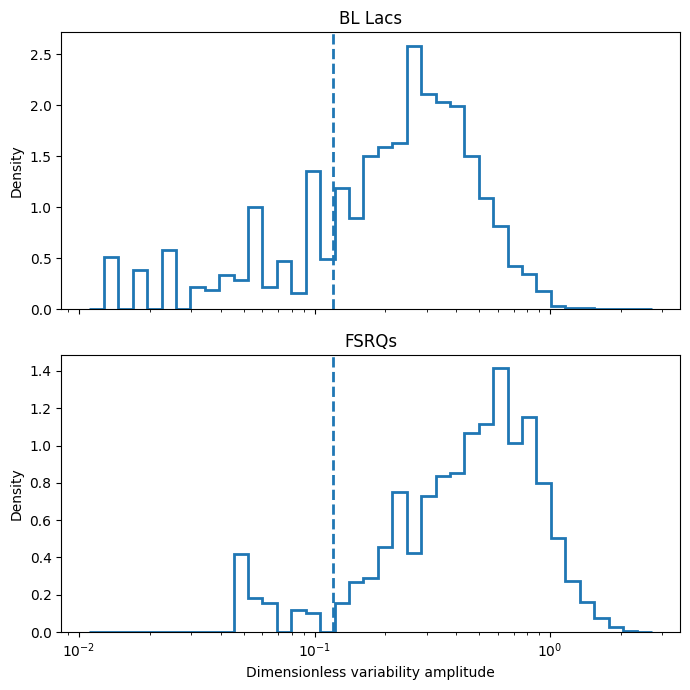

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# pull AGN Frac_Variability for BL Lacs and FSRQs
bll = pd.to_numeric(
    agn.loc[agn["CLASS_clean"].eq("bll"), "Frac_Variability"],
    errors="coerce"
).dropna()

fsrq = pd.to_numeric(
    agn.loc[agn["CLASS_clean"].eq("fsrq"), "Frac_Variability"],
    errors="coerce"
).dropna()

# keep only positive values (log x-axis needs >0)
bll = bll[bll > 0]
fsrq = fsrq[fsrq > 0]

# log-spaced bins for a clean log-x histogram
xmin = min(bll.min(), fsrq.min(), A_ams) * 0.8
xmax = max(bll.max(), fsrq.max(), A_ams) * 1.2
bins = np.logspace(np.log10(xmin), np.log10(xmax), 40)

fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

for ax, data, title in [
    (axes[0], bll, "BL Lacs"),
    (axes[1], fsrq, "FSRQs")
]:
    ax.hist(data, bins=bins, density=True, histtype="step", linewidth=2)
    ax.axvline(A_ams, linestyle="--", linewidth=2)
    if A_ams_err is not None:
        ax.axvspan(A_ams - A_ams_err, A_ams + A_ams_err, alpha=0.2)

    ax.set_ylabel("Density")
    ax.set_title(title)

axes[1].set_xscale("log")
axes[1].set_xlabel("Dimensionless variability amplitude")

plt.tight_layout()
out = "figures/Fig05_unified_variability.png"   # pick your filename
plt.savefig(out, dpi=300, bbox_inches="tight")
print("Saved:", out)
plt.show()


In [55]:
for ax in axes:
    ax.set_xscale("log")


In [56]:
axes[0].set_xlim(xmin, xmax)
axes[1].set_xlim(xmin, xmax)


(np.float64(0.0110671424), np.float64(2.7068928))

In [57]:
axes[0].axvline(A_ams, ls="--", lw=2, label="AMS-02 A (main bin)")
axes[1].axvline(A_ams, ls="--", lw=2, label="AMS-02 A (main bin)")
axes[0].legend()


In [58]:
print("BL Lac Frac_Variability:", bll.min(), bll.median(), bll.max())
print("FSRQ  Frac_Variability:", fsrq.min(), fsrq.median(), fsrq.max())
print("AMS A:", A_ams)


BL Lac Frac_Variability: 0.013833928 0.368811915 2.255744
FSRQ  Frac_Variability: 0.05131929 0.68696435 2.0663962
AMS A: 0.12
